<a href="https://colab.research.google.com/github/jehor737/Dataset_Traffic_Signs/blob/master/Traffic_sign_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Traffic Sign Classifier

---

Using computer vision, deep learning, and convolutional neural networks, create a pipeline that classifies traffic signs.  Train and validate a model so it can classify traffic sign images using the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). After the model is trained, test it on images of traffic signs that you find on the web.

The goals of this project are the following:

- Load the data set
- Explore, summarize and visualize the data set
- Design, train and test a model architecture
- Use the model to make predictions on new images
- Use data augmentation and transfer learning
- Analyze the softmax probabilities of the new images
- Summarize the results of each step with a written report

The writeup should be included in additional cells within the notebook. Some sample cells are included so that you have a guide of what is expected of the writeup. Additionally, add a README file with an introduction to what you developed, as well as the steps needed to run it.

**Notes:** 
- Unless you have set up a GPU on a desktop with all the needed packages, train the model using a GPU enabled google colab environment.
- Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run.

**Rubric:**

1. Uploaded the notbook with all cells executed and the writeup cells, and the HTML output of the code.
2. Downloaded and loaded the dataset. There was a description of the data, and a visualization of one image of each category.
3. Preprocessed the data, and provided a description of the preprocessing steps taken. Use data augmentation to improve the available data.
4. Defined a model architecture using Convlolutional layers. Justified the model architecture based on other models, such as VGG or GoogleNet.
5. Described how the model was trained, mentioning how the hyperparameters (optimizer, batch size, loss function, etc) were selected, and what tests / modifications to the model you performed.
6. Tested the model on a subset of the data set and measure performance. 
7. Included images of traffic signs found from the web in a different folder, and tested the model on said images. Those images were visualized, and a discussion as to why those were chosen was included.
8. Measured the performance on the new images and compared it to the test dataset.
9. For the new images, output of the top 5 softmax predictions was included, and mentioned why you think those predictions were made.
10. Achieved at least 80% accuracy on the test images.
11. Create an additional model using transfer learning to try to improve performance.
12. Saved the model and weights to a file for later use.

## Basic includes

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import cv2

from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
import os

Using TensorFlow backend.


## Load and visualize the data

Provide a basic summary of the German traffic sign data set. In the code, the analysis should be done using python, numpy, and matplotlib rather than hardcoding results manually. Include a graph of the distribution of the image classes.

- The size of training set is ?
- The size of the validation set is ?
- The size of test set is ?
- The shape of a traffic sign image is ?
- The number of unique classes/labels in the data set is ?

In [ ]:
!git clone https://github.com/jehor737/Dataset_Traffic_Signs.git

fatal: destination path 'Dataset_Traffic_Signs' already exists and is not an empty directory.


### Load the dataset

In [ ]:
base_dir = 'Dataset_Traffic_Signs/'
train_dir = os.path.join(base_dir,'training')
test_dir = os.path.join(base_dir,'test')
prueba_dir = os.path.join(base_dir,'pruebas')
file = 'weights.best.hdf5'
classes = os.listdir(train_dir)
batch_size = 50
resize_val = 60
labels_classes = []
for i in range(len(classes)):
  labels_classes.append(str(i))
def preprocessing(image):
  img = image
  #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #img = cv2.equalizeHist(img.astype('uint8'))
  img = cv2.GaussianBlur(img, (5,5), 0)
  #Normalization
  #mean  = img.mean()
  #std = img.std()
  #img -= mean
  #img /= std
  #img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  #Rescale
  #img = img * (1./255)
  
  return img

In [ ]:
# TODO: Add the needed code to load data set
train_data_gen = ImageDataGenerator(rescale=1./255,preprocessing_function=preprocessing,
                                    shear_range=0.2, 
                                    zoom_range=0.3,
                                    fill_mode="nearest",
                                    validation_split=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255,preprocessing_function=preprocessing)


train_generator = train_data_gen.flow_from_directory(
    train_dir,target_size=(resize_val,resize_val),classes=labels_classes,
batch_size=batch_size,class_mode='categorical', subset='training')


validation_generator = train_data_gen.flow_from_directory(
    train_dir,target_size=(resize_val,resize_val),classes=labels_classes,
batch_size=batch_size, class_mode='categorical', subset='validation')

test_generator = test_data_gen.flow_from_directory(
    test_dir,target_size=(resize_val,resize_val),classes=labels_classes,
batch_size=batch_size, class_mode='categorical')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
Found 12630 images belonging to 43 classes.


## Answer

I downloaded the traffic sign images from the German Traffic Sign Dataset. I used the official GTSRB training set that contains 39,209 training images in 43 classes, from here I took the 20% for validation. After that I downloaded the GTSRB testing set that contains 12,630 test images, and a CSV file that has extended annotations including class ids of the test images. To use these datasets I did a Python script with a function that changed the names of the class folders in the training set, and another function to move the test images to a folder of their corresponding class based on the CSV file, and then I uploaded all the images to a Github repository. After that I downloaded the repository in Google Colab and I did 3 generators one for training, one for validation and one for testing, with a batch size of 50, a target size of 60, with all the labels, a rescale of 1./255, a preprocessing function and some data augmentation.
- The size of training set is **31368**
- The size of the validation set is **7841 (20% from training dataset)**
- The size of test set is **12630**
- The shape of a traffic sign image is **Dim 3, example (43,41,3)**
- The number of unique classes/labels in the data set is **43**

### Visualize the data set

Using matplotlib, include a figure with one image from each class. Propose a class name for each.

In [ ]:
class_name = {"0":"Speed_Limit_20",
              "1":"Speed_Limit_30",
              "2":"Speed_Limit_50",
              "3":"Speed_Limit_60",
              "4":"Speed_Limit_70",
              "5":"Speed_Limit_80",
              "6":"Speed_Limit_Not_80",
              "7":"Speed_Limit_100",
              "8":"Speed_Limit_120",
              "9":"Exceed_car",
              "10":"Exceed_truck",
              "11":"Front_arrow",
              "12":"Warning_Sign",
              "13":"Yield_Sign",
              "14":"Stop_Sign",
              "15":"Empty_Sign",
              "16":"Truck_Sign",
              "17":"End_of_Road",
              "18":"Straight_Lane_Sign",
              "19":"Left_Curve_Sign",
              "20":"Right_Curve_Sign",
              "21":"Dangerous_Curve_Sign",
              "22":"Speed_Reducer_Sign",
              "23":"Slippery_Road_Sign",
              "24":"Lane_Reduction_Sign",
              "25":"Working_Man_Sign",
              "26":"Traffic_Light_Sign",
              "27":"Crosswalk_Sign",
              "28":"School_Crosswalk_Sign",
              "29":"Bicycle_Sign",
              "30":"Snow_Sign",
              "31":"Deer_Cross_Sign",
              "32":"Forbidden_Sign",
              "33":"Turn_Right_Sign",
              "34":"Turn_Left_Sign",
              "35":"Continue_Front_Sign",
              "36":"Right_Exit_Sign",
              "37":"Left_Exit_Sign",
              "38":"Pass_Right_Lateral_Sign",
              "39":"Pass_Left_Lateral_Sign",
              "40":"Roundabout_Sign",
              "41":"Not_Exceed_Car",
              "42":"Not_Exceed_Truck"
             }

Text(0.5, 1.0, 'Distribution of images in Training Dataset')

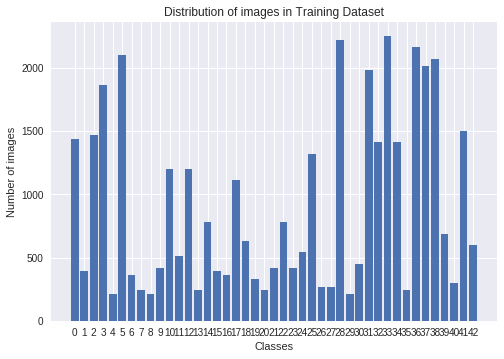

In [ ]:
files=[]
for clase in os.listdir(train_dir):
  files.append(len(os.listdir(os.path.join(train_dir, clase))))

plt.bar(labels_classes,files)
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.title("Distribution of images in Training Dataset")

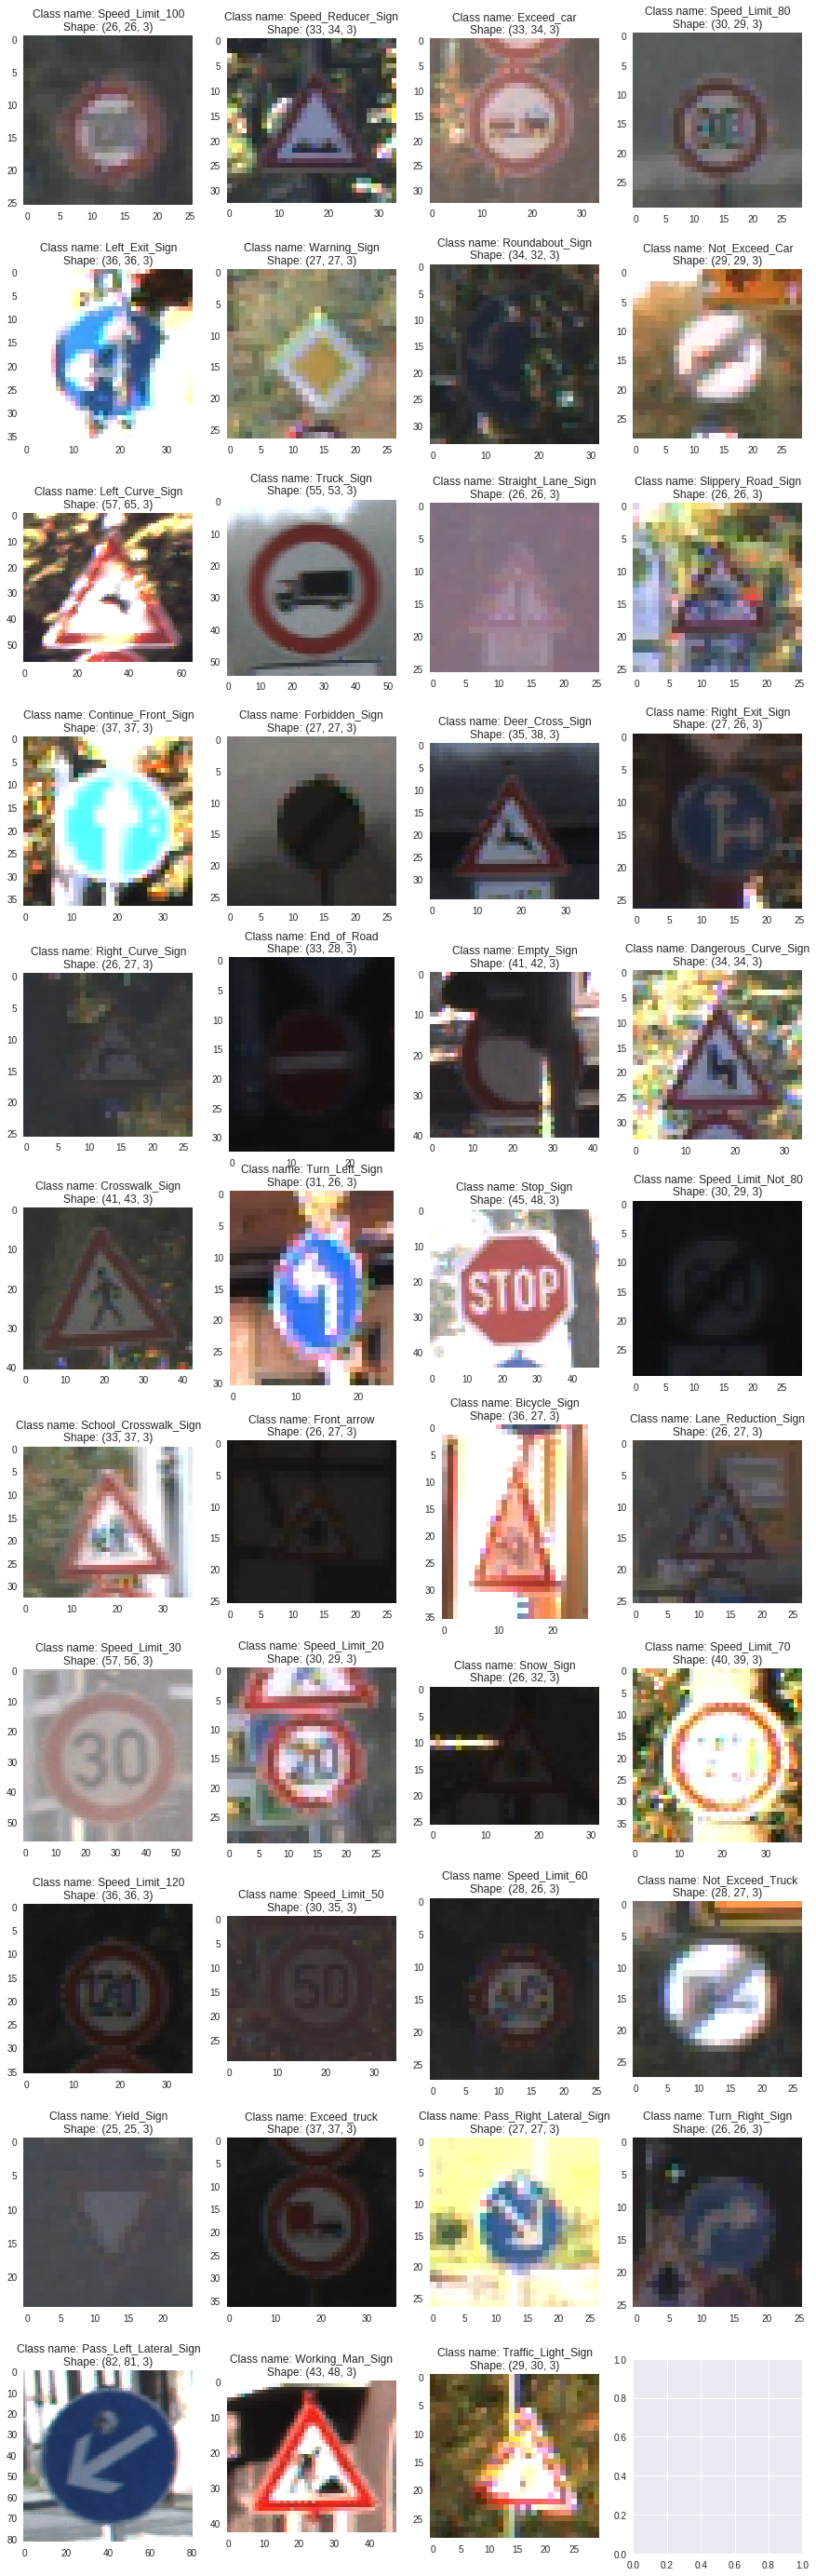

In [ ]:
# TODO: Add the needed code to visualize
f, plots = plt.subplots(11, 4, figsize=(15,50))
plots = [plot for sublist in plots for plot in sublist]

for clase, plot in zip(classes, plots):
  image = cv2.imread(os.path.join(train_dir, clase, '00000_00000.ppm'))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plot.grid(None)
  plot.imshow(image)
  plot.set_title('Class name: '+class_name[clase]+"\nShape: "+str(image.shape))

## Preprocess the data set

Propose a preprocessing pipeline for the images. At least, the data should be normalized and augmented, but other techniques have to be considered: grayscale, blurring, using mean and standard deviation, etc. Describe what techniques you used and why. 

Consider using both OpenCV and [Keras' Imagedatagenerators](https://keras.io/preprocessing/image/) for this step.

Additionally, include a plot of the images before and after the preprocessing step.

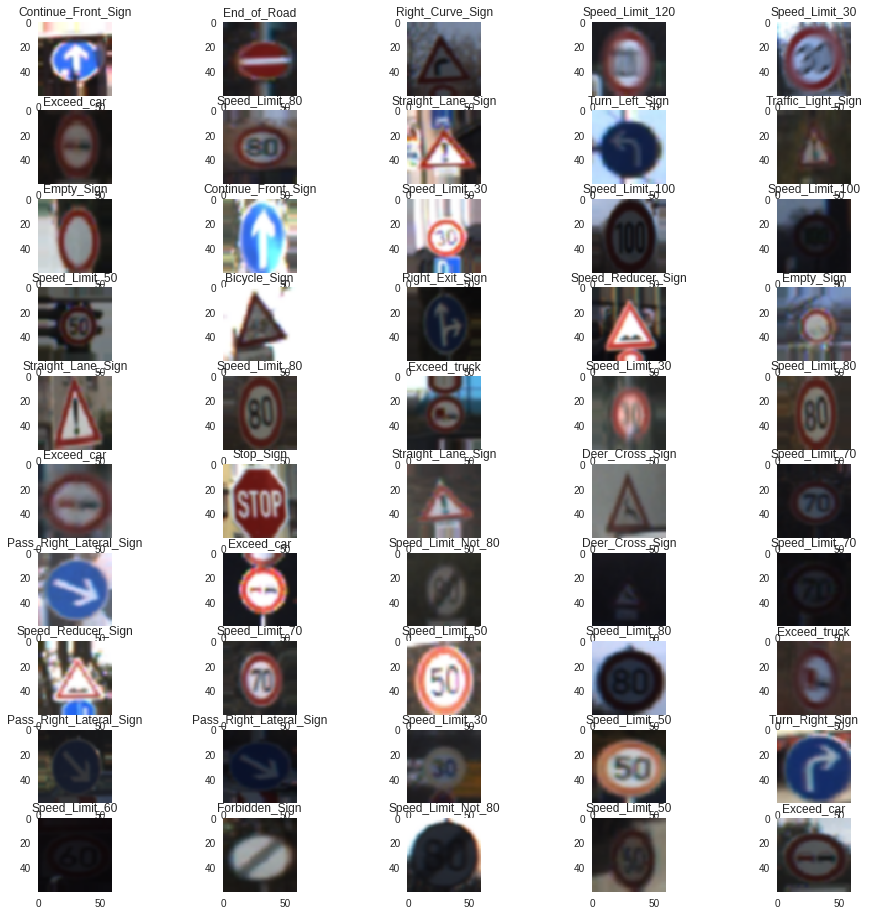

In [ ]:
# TODO: Preprocess the data
images, labels = train_generator.next()
f, plots = plt.subplots(10, 5, figsize=(16,16))
plots = [plot for sublist in plots for plot in sublist]
i=0
for image, plot in zip(images, plots):
  plot.grid(None)
  label = [j for j,x in enumerate(labels[i]) if x == 1.]
  plot.imshow(image)
  plot.set_title(class_name[str(label[0])])
  i+=1

## Preprocessing Explanation

For preprocessing I first tried with normalization because I thought I can have all regions of the images with a "equal" quantity on the areas, but I didn't have good results after the training so after that I discarded the normalization and decided to apply grayscale and a gaussian blur to reduce image noise, and also inside this preprocessing function I applied the rescaling by 1/255  in each channel. After testing the model and watched that images were with many differences in brighter or darker images I decided to apply histogram equalization to do an adjustment of contrast and lighting in the images so they could be clearer in the features extraction from the convolutional layers. In order to use the preprocessing_function parameter in ImageDataGenerator I got back to RGB the image and then apply rescale. But histogram equalization gave a little bit less accuracy than only applying Gaussian Blur and grayscale, and even only applying Gaussian Blur could give better accuracy than applying also grayscale. So I just leave a Gaussian Blur in the preprocessing but I can also suggest to do grayscale combined with Gaussian Blur to do the image preprocessing.

## Design and test a model

Design and implement a deep learning model, tran and test it with the german traffic sign data set. It is recommended to start from already stablished models. For reference, look at: [Common architectures in convolutional neural networks.](https://www.jeremyjordan.me/convnet-architectures/), [Convolutional networks case studies](http://cs231n.github.io/convolutional-networks/#case), [VGG Net, 1st runner of of ilsvlc 2014](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11), [GoogLeNet, winner of ilsvrc 2014](https://medium.com/coinmonks/paper-review-of-googlenet-inception-v1-winner-of-ilsvlc-2014-image-classification-c2b3565a64e7), [Resnet, winner of ilsvrc 2015](https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8).

Describe the model you used and discuss why you selected it.

### Model Description
I used a model that started with 2 convolutional layers with 32 filters, and a kernel size of (3,3), with activation relu and then applied a batch normalization so distribution of the inputs doesn't change due to parameter updates from each batch, and after that I applied a max pooling 2D layer with a pool size of (2,2). This double 32 filters with kernel size of (3,3) are used because with that kind of configuration you cover bigger effective areas with less parameter rather than with bigger kernel sizes, this behavior is similar in the VGG16 neural network architecture, I used this architecture as a reference to build my model. So I repeated the double convolutional layers but with more filters, the first was 32, the second was 64 and a third one with 128, and also the batch normalization and the max pooling. After the convolutional layers I did the flatten and added 2 dense layers with 256 units each and relu activation, and finally an output layer with the 43 classes and activation softmax because it is a categorical problem. 

I compiled this model with rmsprop optimizer to ensure better results in accuracy, categorical crossentropy loss because it is a multi-class problem, and the accuracy metrics, and also an early stop with patience 3 to prevent overfitting.

In [ ]:
# TODO: Define a model based on a particular architecture. Include the model summary.
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(resize_val,resize_val,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.SpatialDropout2D(0.3))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.SpatialDropout2D(0.3))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.SpatialDropout2D(0.3))


model.add(layers.Flatten())

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(len(classes), activation="softmax"))

model.summary()


early_stop = EarlyStopping(monitor="val_loss", patience=3)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

## Train and test the model

Include a discussion on the tests / different configurations used for the optimizer, batch size, epochs, and other hyperparameters for the training. Use early stopping and save the best weights as the training develops. Include plots for the training and validation accuracy of the model. Additionally, evaluate the model with the test data. If you used a stablished architecture, mention why you think it was suitable for this problem.

- Training set accuracy of **98.24% (highest value)**
- Validation set accuracy of **96.53% (highest value)**
- Test set accuracy of **97.34% (highest value)**

- What were some problems with the initial architecture?
- How was the architecture adjusted and why was it adjusted? 
- Which parameters were tuned? How were they adjusted and why?
- Did the model over or underfit? When and why do you think it happened?
After the training step, save both the model and the weights to a file.
  
****
### Answers to questions above
I started with bigger filter values in the first 2 layers and maintain the same value after the first max pooling, that gave me a poor accuracy with many epochs, so I decrease the size of the first layer and try again, I obtained better results so I run it with the weights that I had but I saw it was overfitting, so I added a couple of convolutional layers with 128 filters and I get better results, but I thought I could have even better results I used dropouts to force the convolutional layers to disconnect some of them so they don't have stronger weight than another ones and also batch normalization to improve learning among activations. With those steps I finished with this model. I never changed the optimizer because rmsprop is better for accuracy and I used always the loss as categorical crossentropy because it is a multi-class problem.

I also tried with different input shapes, so also the images were also resized in the same way, in this part I noticed that with bigger sizes the learning was extremely low, I think this behavior appeared because the images in the dataset are very small and a very high resize combined with the noise the image have makes that all images become too similar between each other, so with smaller resizes the images can have a better adjustment in the training, that is the reason I have a resize (or target size or input shape) of 60.

The model started to overfit, according to the early stop, in the epoch 6 because it starts to detect the noise of the images in a very specific way so the classification starts to be too good for the dataset and this will be bad for new datasets.

In [ ]:
# TODO: Define the training, and discuss the process
#if os.path.isfile("weights.best.hdf5"):
#  model.load_weights("weights.best.hdf5")

checkpointer = ModelCheckpoint(filepath='weights.best.hdf5', verbose=1, save_best_only=True)
history = model.fit_generator(train_generator, 
                    epochs=35, 
                    validation_data=validation_generator, 
                    steps_per_epoch=train_generator.samples // batch_size, 
                    validation_steps=validation_generator.samples // batch_size,
                    callbacks=[checkpointer, early_stop])

model.save('full_model.h5')
model.save_weights('weights.hdf5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
627/627 [==============================] - 102s 163ms/step - loss: 0.8148 - acc: 0.7618 - val_loss: 0.5449 - val_acc: 0.8546

Epoch 00001: val_loss improved from inf to 0.54486, saving model to weights.best.hdf5
Epoch 2/35
627/627 [==============================] - 100s 159ms/step - loss: 0.1678 - acc: 0.9531 - val_loss: 0.8431 - val_acc: 0.8233

Epoch 00002: val_loss did not improve from 0.54486
Epoch 3/35
627/627 [==============================] - 100s 160ms/step - loss: 0.1150 - acc: 0.9692 - val_loss: 0.1386 - val_acc: 0.9653

Epoch 00003: val_loss improved from 0.54486 to 0.13863, saving model to weights.best.hdf5
Epoch 4/35
627/627 [==============================] - 100s 160ms/step - loss: 0.0899 - acc: 0.9771 - val_loss: 0.1747 - val_acc: 0.9616

Epoch 00004: val_loss did not improve from 0.13863
Epoch 5/35
627/627 [==============================] - 102s 162ms/step - loss: 0.0831 - acc: 0.9792 - val_loss: 0.1639 - val_ac

In [ ]:
results = model.evaluate_generator(test_generator,steps=test_generator.samples // batch_size)
print(results)

[0.13866534020326612, 0.9734126996426355]


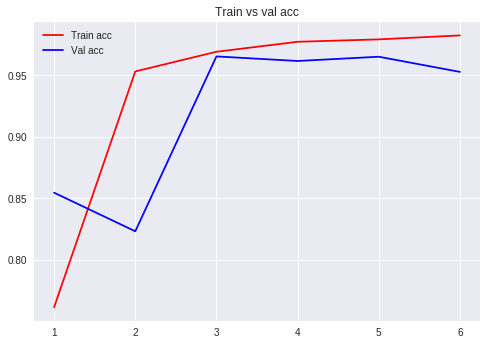

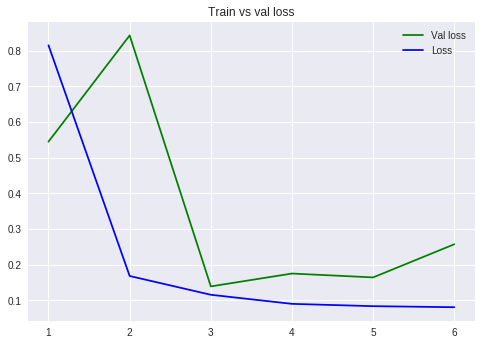

In [ ]:
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
acc = history.history["acc"]

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc, 'r', label = "Train acc")
plt.plot(epochs,val_acc, 'b', label = "Val acc")
plt.title("Train vs val acc")
plt.legend()
plt.figure()

plt.plot(epochs,val_loss, 'g', label = "Val loss")
plt.plot(epochs,loss, 'b', label = "Loss")
plt.title("Train vs val loss")
plt.legend()
plt.show()

## Test the model on new images

Find at least 10 new images from different categories and use your model to predict the traffic sign type. Plot each of the images before the prediction, after the preprocessing step, and after the prediction with its predicted label.

### Chosen Images

I chose 10 images of traffic signs that I think can be found with more frequency mainly in a city but also in a highway, so the ten images I chose were:

- Speed limit 50
- Speed limit 120
- Stop
- Traffic light
- Truck
- Snow
- Deer
- End of road
- Bicycle
- Family/School Crosswalk

I place this 10 images in folders of their class and uploaded to the Github repository so I can use them with a generator with the flow_from_directory method and apply the same preprocessing that I did with the training, validation and testing sets, and the same target size.

### Load the images



#### Before Preprocessing

In [ ]:
prueba_gen = ImageDataGenerator(rescale=1./255)
prueba_generator = prueba_gen.flow_from_directory(
    prueba_dir,target_size=(resize_val,resize_val),classes=labels_classes,
    shuffle=False,
    batch_size=10, class_mode='categorical')

Found 10 images belonging to 43 classes.


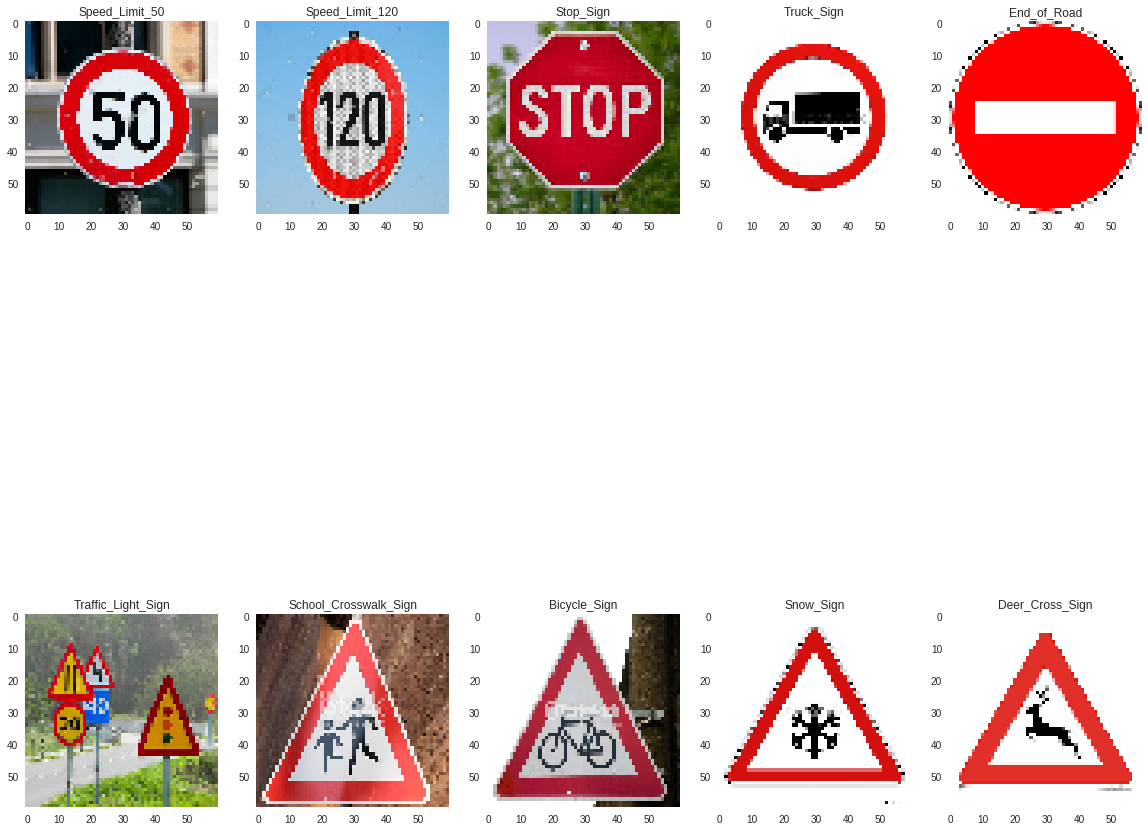

In [ ]:
images, labels = prueba_generator.next()
f, plots = plt.subplots(2, 5, figsize=(20,20))
plots = [plot for sublist in plots for plot in sublist]
i=0
for image, plot in zip(images, plots):
  plot.grid(None)
  label = [j for j,x in enumerate(labels[i]) if x == 1.]
  plot.imshow(image)
  plot.set_title(class_name[str(label[0])])
  i+=1

In [ ]:
# TODO Load the new images
prueba_gen = ImageDataGenerator(rescale=1./255,preprocessing_function=preprocessing)
prueba_generator = prueba_gen.flow_from_directory(
    prueba_dir,target_size=(resize_val,resize_val),classes=labels_classes,
    shuffle=False,
    batch_size=10, class_mode='categorical')

Found 10 images belonging to 43 classes.


### Predict the type for each image

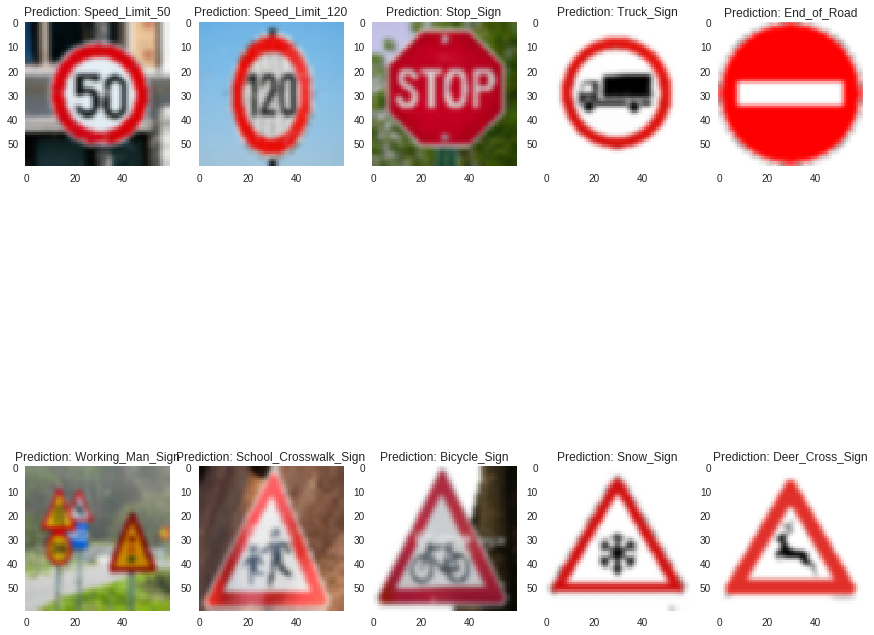

In [ ]:
# TODO use the model to make prediction on the images. Remember to preprocess the new images with 
# the same process used for the training images
error = []
f, plots = plt.subplots(2, 5, figsize=(15,15))
plots = [plot for sublist in plots for plot in sublist]

images, labels = prueba_generator.next()

for image, label, plot in zip(images,labels, plots):
  label_p = [j for j,x in enumerate(label) if x == 1.]
  plot.grid(None)
  plot.imshow(image)
  prediction = model.predict_classes(np.expand_dims(image,axis=0))
  message = "Prediction: "+class_name[str(prediction[0])]
  if int(prediction[0]) != int(label_p[0]):
    #print(int(prediction[0]), int(label_p[0]))
    error.append((image,prediction[0], label_p[0]))
  plot.set_title(message)
  


### Analyze the performance

Calculate the accuracy, and plot the images that were incorrectly classified. Discuss why those images were incorrectly classified.

Accuracy 0.9


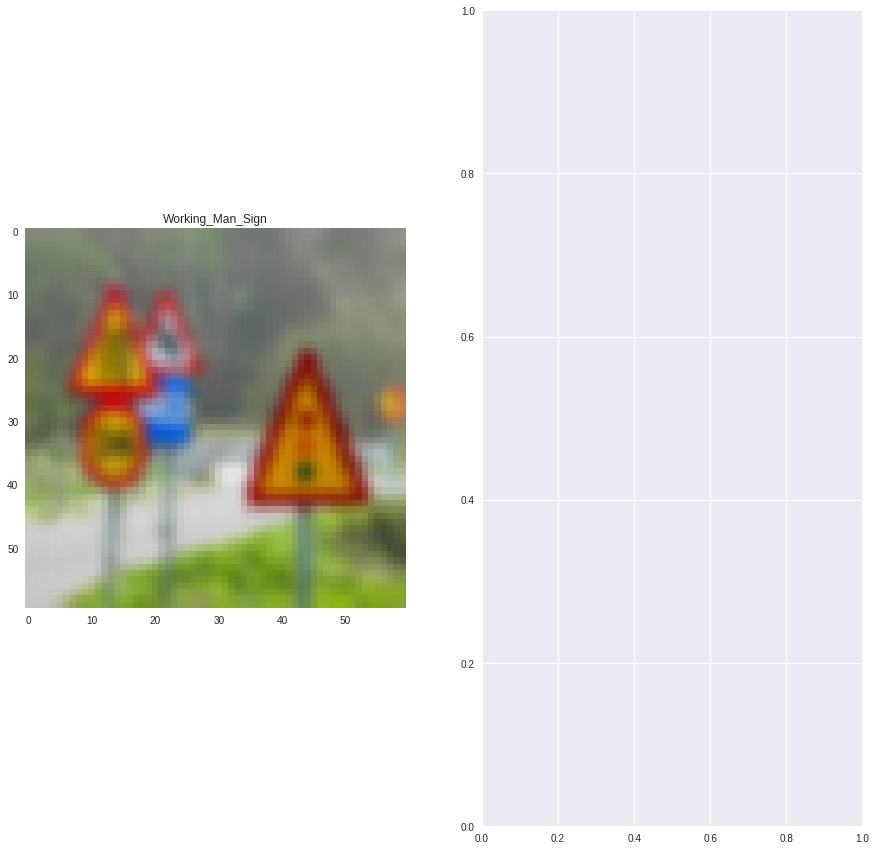

In [ ]:
# TODO Calculate the accuracy for the new images
accuracy = (len(images) - len(error)) / len(images)
print("Accuracy",accuracy)
num = -1
if len(error) > 0: 
  if len(error) ==1:
    num = len(error)+1
  else:
    num = len(error)
  f, subplot = plt.subplots(1, num, figsize=(15,15))
  for imgLabel,subplots in zip(error, subplot):
      subplots.grid(None)
      subplots.imshow(imgLabel[0])
      subplots.set_title(class_name[str(imgLabel[1])])

## Comparison between new images and testing dataset

The testing dataset in this case gave an accuracy of % (/10 images), the model predicted correctly the  images, this is because the images are very clear, they don't have too much noise in the image such as poor or high light, watermarks, other signs or objects that don't correspond to the images that are being used here in the classificaion process, on the other side the testing dataset can have lack of contrast or other situations that can affect the model in the classification of the images, although both the new images and the testing dataset have the same preprocessing process, the initial conditions of the datasets affect in the final classification that the model does to them. The images can be incorrectly classified if a part of the image has higher density for a sign, the expected result is too far away inside the image or has too many elements inside the image.

## Output the top 5 softmax probabilites for each image

For each of the new images, print the top 5 softmax categories it predicted. Check [numpy argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) to get sorted indices of a prediction.

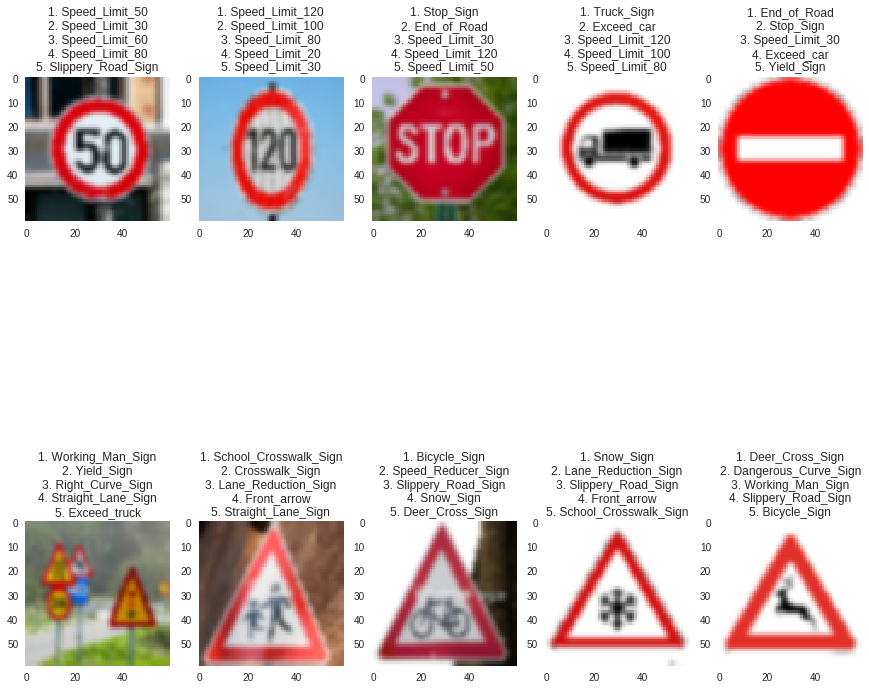

In [ ]:
# TODO: for each image, plot the image and print the top 5 softmax categories predicted
f, plots = plt.subplots(2, 5, figsize=(15,15))
plots = [plot for sublist in plots for plot in sublist]
for image, label, plot in zip(images,labels, plots):
  label_p = [j for j,x in enumerate(label) if x == 1.]
  plot.grid(None)
  plot.imshow(image)
  prediction = np.argsort(model.predict(np.expand_dims(image,axis=0)))
  lista = prediction[0][::-1]
  top_5 = lista[:5]
  message = "1. "+class_name[str(top_5[0])]+"\n2. "+class_name[str(top_5[1])]+"\n3. "+class_name[str(top_5[2])]
  message2 = "\n4. "+class_name[str(top_5[3])]+"\n5. "+class_name[str(top_5[4])]
  final = message+message2
  plot.set_title(final)

## Top 5 of new images explanation

The images received 5 highest probabilities of the classification they can belong, and the results seems to be as expected, for example with similar images of speed limits, in the "50 speed limit" the first prediction is correct and the next 3 predictions are also speed limits signs but it gives the first one as the correct signso this indicates that the model is doing a good classification of the traffic signs. Another thing we can notice is that some traffic signs have a prediction of another traffic sign, and the other traffic sign has also the prediction of the previous traffic sign, for example school_crosswalk_sign and snow_sign both have the prediction of each other in similar positions, but still they give a correct classification of the image. In general the next 4 predictions that the model gives have similar figures or shapes of other classes of the dataset but the main characteristics of the correct class prevail in the model and that is translated to a correct prediction of the image.

## Create a new model using transfer learning

Use one of the pretrained models from [keras applications](https://keras.io/applications/#applications) to train a new model for the traffic data set. Test the model on the test data, and the new images you downloaded. As with the previous steps, record the accuracy of the model, and print the top 5 softmax predictions for the 10 images you acquired. Plot the accuracy, and the validation accuracy of this model.

- Mention why you chose the selected pretrained model.
  - **I chose VGG16 architecture because it is supposed to achieve an error rate under 10% and it is also the idea I used to do my model in the previous steps, also VGG is an architecture that many other architectures used in the idea of the filters and kernel sizes.**
- Training set accuracy of **89.34%**
- Validation set accuracy of **70.34%**
- Test set accuracy of **74.31%**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(input_shape=(resize_val,resize_val,3), include_top=False, weights='imagenet', classes=len(labels_classes))
conv_base.summary()
conv_base.trainable=False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 60, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0         
__________

In [ ]:
new_model = models.Sequential()
new_model.add(conv_base)
new_model.add(layers.Flatten()) 
new_model.add(layers.Dense(512, activation='relu'))
new_model.add(layers.Dropout(0.4))
new_model.add(layers.Dense(512, activation='relu'))
new_model.add(layers.Dense(len(classes), activation='softmax'))
new_model.summary()



conv_base.trainable = True
set_trainable = False 

for layer in conv_base.layers: 
  if layer.name == 'block5_conv1': 
    set_trainable = True 
    
  if set_trainable: 
    layer.trainable = True
  else: layer.trainable = False


early_stop = EarlyStopping(monitor="val_loss", patience=3)

new_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 43)                22059     
Total params: 15,262,059
Trainable params: 547,371
Non-trainable params: 14,714,688
__________________________________________________________

In [ ]:
# TODO: Define the training, and discuss the process
#if os.path.isfile("weights.vgg.best.hdf5"):
#  new_model.load_weights("weights.vgg.best.hdf5")

checkpointer = ModelCheckpoint(filepath='weights.vgg.best.hdf5', verbose=1, save_best_only=True)
history_vgg = new_model.fit_generator(train_generator, 
                    epochs=35, 
                    validation_data=validation_generator, 
                    steps_per_epoch=train_generator.samples // batch_size, 
                    validation_steps=validation_generator.samples // batch_size,
                    callbacks=[checkpointer, early_stop])

new_model.save('full_model.vgg.h5')
new_model.save_weights('weights.vgg.hdf5')

Epoch 1/35
627/627 [==============================] - 111s 177ms/step - loss: 1.7134 - acc: 0.4690 - val_loss: 1.2006 - val_acc: 0.6152

Epoch 00001: val_loss improved from inf to 1.20060, saving model to weights.vgg.best.hdf5
Epoch 2/35
627/627 [==============================] - 108s 172ms/step - loss: 0.7217 - acc: 0.7741 - val_loss: 1.1704 - val_acc: 0.6831

Epoch 00002: val_loss improved from 1.20060 to 1.17036, saving model to weights.vgg.best.hdf5
Epoch 3/35
627/627 [==============================] - 109s 174ms/step - loss: 0.5166 - acc: 0.8501 - val_loss: 1.7323 - val_acc: 0.6664

Epoch 00003: val_loss did not improve from 1.17036
Epoch 4/35
627/627 [==============================] - 108s 173ms/step - loss: 0.4773 - acc: 0.8782 - val_loss: 1.5983 - val_acc: 0.6848

Epoch 00004: val_loss did not improve from 1.17036
Epoch 5/35
627/627 [==============================] - 108s 173ms/step - loss: 0.4505 - acc: 0.8934 - val_loss: 1.6578 - val_acc: 0.7034

Epoch 00005: val_loss did not

In [ ]:
results_vgg = new_model.evaluate_generator(test_generator,steps=test_generator.samples // batch_size)
print(results_vgg)

[1.3621372817054627, 0.7431746030610705]


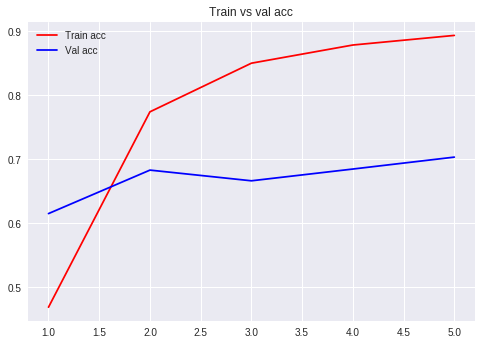

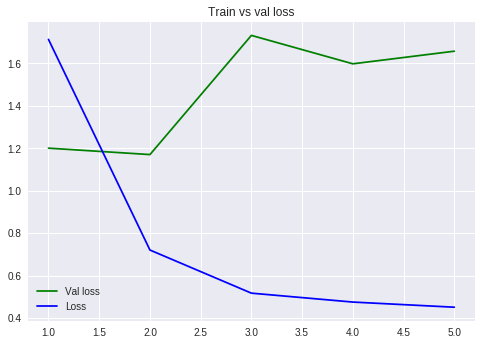

In [ ]:
val_loss_vgg = history_vgg.history["val_loss"]
val_acc_vgg = history_vgg.history["val_acc"]
loss_vgg = history_vgg.history["loss"]
acc_vgg = history_vgg.history["acc"]

epochs = range(1, len(acc_vgg)+1)

plt.plot(epochs,acc_vgg, 'r', label = "Train acc")
plt.plot(epochs,val_acc_vgg, 'b', label = "Val acc")
plt.title("Train vs val acc")
plt.legend()
plt.figure()

plt.plot(epochs,val_loss_vgg, 'g', label = "Val loss")
plt.plot(epochs,loss_vgg, 'b', label = "Loss")
plt.title("Train vs val loss")
plt.legend()
plt.show()

19 8
12 26
29 30
19 31


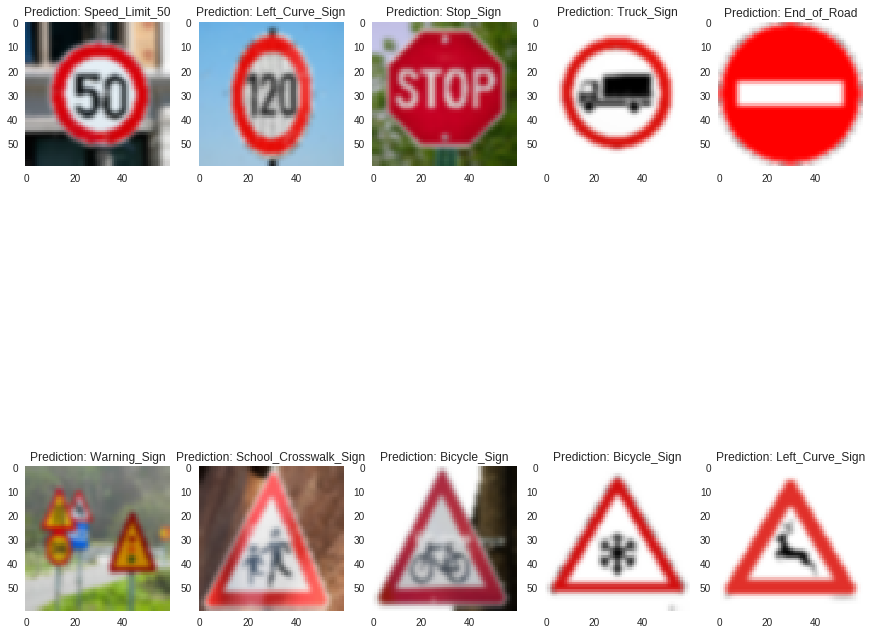

In [ ]:
error_vgg = []
f, plots = plt.subplots(2, 5, figsize=(15,15))
plots = [plot for sublist in plots for plot in sublist]

images, labels = prueba_generator.next()

for image, label, plot in zip(images,labels, plots):
  label_p = [j for j,x in enumerate(label) if x == 1.]
  plot.grid(None)
  plot.imshow(image)
  prediction = new_model.predict_classes(np.expand_dims(image,axis=0))
  message = "Prediction: "+class_name[str(prediction[0])]
  if int(prediction[0]) != int(label_p[0]):
    print(int(prediction[0]), int(label_p[0]))
    error_vgg.append((image,prediction[0], label_p[0]))
  plot.set_title(message)


Accuracy 0.6


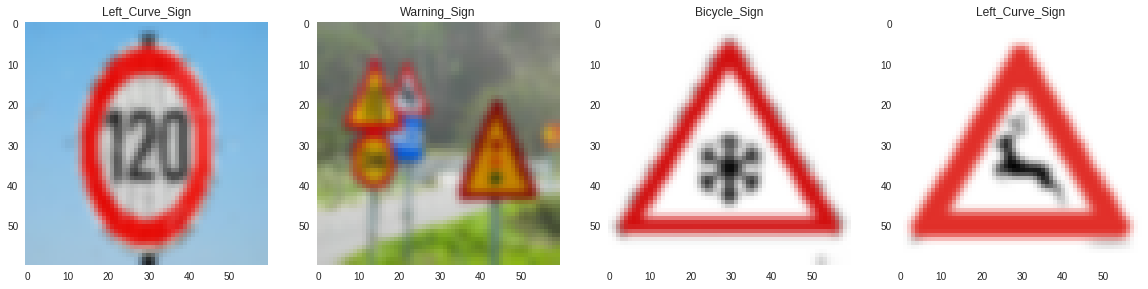

In [ ]:
accuracy = (len(images) - len(error_vgg)) / len(images)
print("Accuracy",accuracy)
num = -1
if len(error_vgg) > 0: 
  if len(error_vgg) ==1:
    num = len(error_vgg)+1
  else:
    num = len(error_vgg)
  f, subplot = plt.subplots(1, num, figsize=(20,20))
  for imgLabel,subplots in zip(error_vgg, subplot):
      subplots.grid(None)
      subplots.imshow(imgLabel[0])
      subplots.set_title(class_name[str(imgLabel[1])])

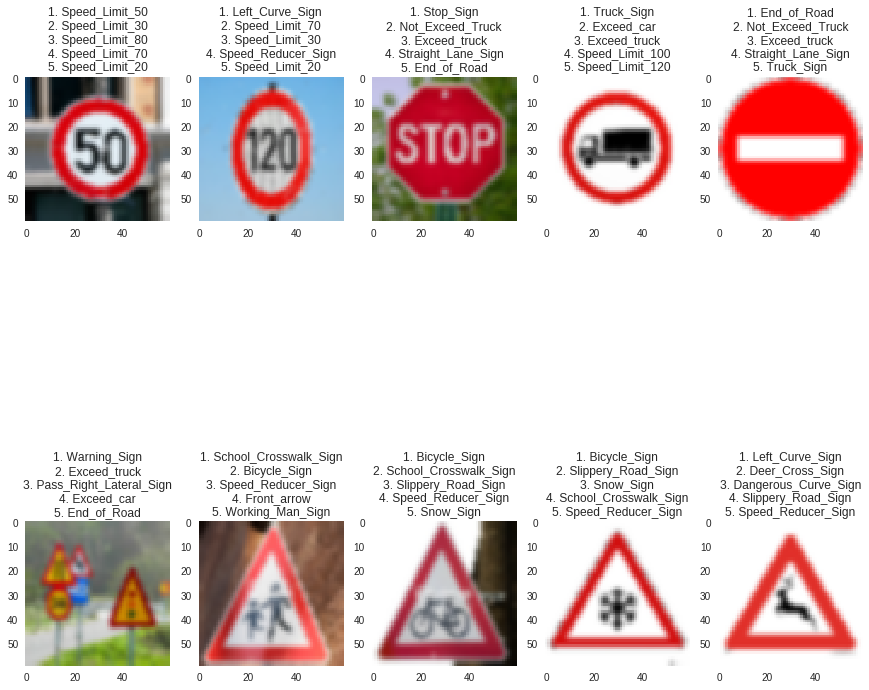

In [ ]:
f, plots = plt.subplots(2, 5, figsize=(15,15))
plots = [plot for sublist in plots for plot in sublist]
for image, label, plot in zip(images,labels, plots):
  label_p = [j for j,x in enumerate(label) if x == 1.]
  plot.grid(None)
  plot.imshow(image)
  prediction = np.argsort(new_model.predict(np.expand_dims(image,axis=0)))
  lista = prediction[0][::-1]
  top_5 = lista[:5]
  message = "1. "+class_name[str(top_5[0])]+"\n2. "+class_name[str(top_5[1])]+"\n3. "+class_name[str(top_5[2])]
  message2 = "\n4. "+class_name[str(top_5[3])]+"\n5. "+class_name[str(top_5[4])]
  final = message+message2
  plot.set_title(final)